In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow.compat.v2 as tf 
import os
#matplotlib的默認作圖風格覆蓋成seaborn模式

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
#在jupyter作圖須輸入此指令

from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [2]:
folder_dir = "C:/Users/TEST/vscode/machine learning/ntut-ml-regression-2020/"
train_data_name = "train-v3.csv"
test_data_name = "test-v3.csv"
valid_data_name = "valid-v3.csv"

train_data = os.path.join(folder_dir, train_data_name)
test_data = os.path.join(folder_dir, test_data_name)
valid_data = os.path.join(folder_dir, valid_data_name)

train_data = pd.read_csv(train_data)
test_data = pd.read_csv(test_data)
valid_data = pd.read_csv(valid_data)
#merge
train_data = pd.concat([train_data,valid_data])


In [3]:
train_data.isnull().sum()

id               0
price            0
sale_yr          0
sale_month       0
sale_day         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
'''
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 
'floors', 'waterfront', 'view', 'grade', 'sqft_above',
'sqft_basement', 'sqft_living15','lat']
test_cols = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 
'floors', 'waterfront', 'view', 'grade', 'sqft_above',
'sqft_basement', 'sqft_living15','lat']

cols = ['price','bedrooms','bathrooms','sqft_living',
        'sqft_lot','yr_built','floors','waterfront','view','grade',
        'sqft_above','sqft_basement','yr_built','yr_renovated','lat',
        'sqft_living15','sqft_lot15']

test_cols = ['id','bedrooms','bathrooms','sqft_living',
        'sqft_lot','yr_built','floors','waterfront','view','grade',
        'sqft_above','sqft_basement','yr_built','yr_renovated','lat'
        ,'sqft_living15','sqft_lot15']
        



'''

cols = ['price','sale_yr','sale_month','sale_day','bedrooms','bathrooms','sqft_living',
        'sqft_lot','yr_built','floors','waterfront','view','condition','grade',
        'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat',
        'long','sqft_living15','sqft_lot15']

test_cols = ['id','sale_yr','sale_month','sale_day','bedrooms','bathrooms','sqft_living',
        'sqft_lot','yr_built','floors','waterfront','view','condition','grade',
        'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat',
        'long','sqft_living15','sqft_lot15']
        
        

train_data = train_data[cols]
test_data = test_data[test_cols]

print(len(cols))
print(len(test_cols))
      

23
23


In [5]:
nparray = train_data.values
features = nparray[:,1:]
label = nparray[:,0]
train_features = preprocessing.scale(features)

In [6]:
model = Sequential()
model.add(Dense(units = 1000, input_dim = len(cols)-1,
               kernel_initializer = 'he_normal',
               activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1000,
               kernel_initializer = 'he_normal',
               activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1000,
               kernel_initializer = 'he_normal',
               activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1,
                kernel_initializer = 'normal',
                activation = 'linear'))

model.compile(loss = 'mean_absolute_error',
               optimizer = 'adam' , metrics = ['accuracy'])

In [14]:
# 準備 x_test 與 y_test 資料 ... [略]

# 從 HDF5 檔案中載入模型
reload_model = tf.keras.models.load_model('my_model.h5')
reload_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              23000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [7]:
train_history = model.fit(x = train_features,
                          y = label,
                          validation_split = 0.15,
                          epochs = 550,
                          batch_size = 20,verbose = 2)

model.save('my_model.h5')

Train on 12858 samples, validate on 2270 samples
Epoch 1/550
 - 4s - loss: 171749.1608 - accuracy: 0.0000e+00 - val_loss: 117122.7292 - val_accuracy: 0.0000e+00
Epoch 2/550
 - 3s - loss: 119085.1003 - accuracy: 0.0000e+00 - val_loss: 110800.8678 - val_accuracy: 0.0000e+00
Epoch 3/550
 - 3s - loss: 114944.8713 - accuracy: 0.0000e+00 - val_loss: 107867.6304 - val_accuracy: 0.0000e+00
Epoch 4/550
 - 3s - loss: 113728.1695 - accuracy: 0.0000e+00 - val_loss: 106631.9547 - val_accuracy: 0.0000e+00
Epoch 5/550
 - 3s - loss: 111676.8524 - accuracy: 0.0000e+00 - val_loss: 106438.9916 - val_accuracy: 0.0000e+00
Epoch 6/550
 - 3s - loss: 109571.5614 - accuracy: 0.0000e+00 - val_loss: 102399.3398 - val_accuracy: 0.0000e+00
Epoch 7/550
 - 3s - loss: 108711.1902 - accuracy: 0.0000e+00 - val_loss: 101079.8445 - val_accuracy: 0.0000e+00
Epoch 8/550
 - 3s - loss: 108498.1597 - accuracy: 0.0000e+00 - val_loss: 100050.2389 - val_accuracy: 0.0000e+00
Epoch 9/550
 - 3s - loss: 108003.4755 - accuracy: 0.000

Epoch 75/550
 - 3s - loss: 77520.7809 - accuracy: 0.0000e+00 - val_loss: 67741.4908 - val_accuracy: 0.0000e+00
Epoch 76/550
 - 3s - loss: 78153.7615 - accuracy: 0.0000e+00 - val_loss: 68876.5300 - val_accuracy: 0.0000e+00
Epoch 77/550
 - 3s - loss: 76875.6046 - accuracy: 0.0000e+00 - val_loss: 66332.0708 - val_accuracy: 0.0000e+00
Epoch 78/550
 - 3s - loss: 77456.8355 - accuracy: 0.0000e+00 - val_loss: 67093.4445 - val_accuracy: 0.0000e+00
Epoch 79/550
 - 3s - loss: 76980.4343 - accuracy: 7.7773e-05 - val_loss: 66188.7615 - val_accuracy: 0.0000e+00
Epoch 80/550
 - 3s - loss: 77489.5049 - accuracy: 0.0000e+00 - val_loss: 68650.8426 - val_accuracy: 0.0000e+00
Epoch 81/550
 - 3s - loss: 77127.0503 - accuracy: 0.0000e+00 - val_loss: 67361.3741 - val_accuracy: 0.0000e+00
Epoch 82/550
 - 3s - loss: 77065.1300 - accuracy: 0.0000e+00 - val_loss: 66090.1686 - val_accuracy: 0.0000e+00
Epoch 83/550
 - 3s - loss: 76990.4989 - accuracy: 0.0000e+00 - val_loss: 66638.0954 - val_accuracy: 0.0000e+00
E

Epoch 149/550
 - 3s - loss: 73023.0449 - accuracy: 0.0000e+00 - val_loss: 65285.0950 - val_accuracy: 0.0000e+00
Epoch 150/550
 - 3s - loss: 73070.1651 - accuracy: 0.0000e+00 - val_loss: 65131.0560 - val_accuracy: 0.0000e+00
Epoch 151/550
 - 3s - loss: 71763.7810 - accuracy: 0.0000e+00 - val_loss: 65489.2013 - val_accuracy: 0.0000e+00
Epoch 152/550
 - 3s - loss: 73149.3926 - accuracy: 0.0000e+00 - val_loss: 64905.3020 - val_accuracy: 0.0000e+00
Epoch 153/550
 - 3s - loss: 72631.7875 - accuracy: 0.0000e+00 - val_loss: 64920.9834 - val_accuracy: 0.0000e+00
Epoch 154/550
 - 3s - loss: 72870.0489 - accuracy: 7.7773e-05 - val_loss: 64560.0182 - val_accuracy: 0.0000e+00
Epoch 155/550
 - 3s - loss: 72254.5392 - accuracy: 0.0000e+00 - val_loss: 64922.7324 - val_accuracy: 0.0000e+00
Epoch 156/550
 - 3s - loss: 72497.1195 - accuracy: 0.0000e+00 - val_loss: 64806.5925 - val_accuracy: 0.0000e+00
Epoch 157/550
 - 3s - loss: 72314.7253 - accuracy: 0.0000e+00 - val_loss: 64279.5365 - val_accuracy: 0.0

Epoch 223/550
 - 3s - loss: 69423.3677 - accuracy: 0.0000e+00 - val_loss: 64094.4265 - val_accuracy: 0.0000e+00
Epoch 224/550
 - 3s - loss: 69912.8133 - accuracy: 0.0000e+00 - val_loss: 64829.1487 - val_accuracy: 0.0000e+00
Epoch 225/550
 - 3s - loss: 70112.7223 - accuracy: 0.0000e+00 - val_loss: 65175.2294 - val_accuracy: 0.0000e+00
Epoch 226/550
 - 3s - loss: 70279.5907 - accuracy: 0.0000e+00 - val_loss: 64350.3481 - val_accuracy: 0.0000e+00
Epoch 227/550
 - 3s - loss: 70265.4286 - accuracy: 0.0000e+00 - val_loss: 66005.1719 - val_accuracy: 0.0000e+00
Epoch 228/550
 - 3s - loss: 70157.1106 - accuracy: 0.0000e+00 - val_loss: 65874.1290 - val_accuracy: 0.0000e+00
Epoch 229/550
 - 3s - loss: 70511.7496 - accuracy: 0.0000e+00 - val_loss: 64657.2648 - val_accuracy: 0.0000e+00
Epoch 230/550
 - 3s - loss: 69717.1378 - accuracy: 0.0000e+00 - val_loss: 65342.8430 - val_accuracy: 0.0000e+00
Epoch 231/550
 - 3s - loss: 70431.1411 - accuracy: 0.0000e+00 - val_loss: 65130.0452 - val_accuracy: 0.0

Epoch 297/550
 - 3s - loss: 68685.2328 - accuracy: 0.0000e+00 - val_loss: 65396.8065 - val_accuracy: 0.0000e+00
Epoch 298/550
 - 3s - loss: 68270.2318 - accuracy: 0.0000e+00 - val_loss: 63687.7132 - val_accuracy: 0.0000e+00
Epoch 299/550
 - 3s - loss: 67963.5300 - accuracy: 0.0000e+00 - val_loss: 67907.3479 - val_accuracy: 0.0000e+00
Epoch 300/550
 - 3s - loss: 68751.3670 - accuracy: 0.0000e+00 - val_loss: 65180.8883 - val_accuracy: 0.0000e+00
Epoch 301/550
 - 3s - loss: 68361.7164 - accuracy: 0.0000e+00 - val_loss: 65627.7206 - val_accuracy: 0.0000e+00
Epoch 302/550
 - 3s - loss: 68027.8540 - accuracy: 0.0000e+00 - val_loss: 66572.3743 - val_accuracy: 0.0000e+00
Epoch 303/550
 - 3s - loss: 67960.8296 - accuracy: 0.0000e+00 - val_loss: 65390.7079 - val_accuracy: 0.0000e+00
Epoch 304/550
 - 3s - loss: 68188.0449 - accuracy: 0.0000e+00 - val_loss: 64343.4082 - val_accuracy: 0.0000e+00
Epoch 305/550
 - 3s - loss: 69043.0836 - accuracy: 0.0000e+00 - val_loss: 64575.6849 - val_accuracy: 0.0

Epoch 371/550
 - 3s - loss: 67620.8153 - accuracy: 0.0000e+00 - val_loss: 65466.3076 - val_accuracy: 0.0000e+00
Epoch 372/550
 - 3s - loss: 67150.3792 - accuracy: 0.0000e+00 - val_loss: 64942.2968 - val_accuracy: 0.0000e+00
Epoch 373/550
 - 3s - loss: 66451.0238 - accuracy: 0.0000e+00 - val_loss: 66824.5782 - val_accuracy: 0.0000e+00
Epoch 374/550
 - 3s - loss: 67259.5073 - accuracy: 0.0000e+00 - val_loss: 65788.7994 - val_accuracy: 0.0000e+00
Epoch 375/550
 - 3s - loss: 66778.2032 - accuracy: 7.7773e-05 - val_loss: 66483.5248 - val_accuracy: 4.4053e-04
Epoch 376/550
 - 3s - loss: 67140.1960 - accuracy: 0.0000e+00 - val_loss: 64744.2634 - val_accuracy: 0.0000e+00
Epoch 377/550
 - 3s - loss: 67657.7524 - accuracy: 0.0000e+00 - val_loss: 65648.5287 - val_accuracy: 0.0000e+00
Epoch 378/550
 - 3s - loss: 67468.2881 - accuracy: 0.0000e+00 - val_loss: 65416.5673 - val_accuracy: 0.0000e+00
Epoch 379/550
 - 3s - loss: 66798.0471 - accuracy: 0.0000e+00 - val_loss: 64456.1794 - val_accuracy: 0.0

Epoch 445/550
 - 3s - loss: 65957.9576 - accuracy: 0.0000e+00 - val_loss: 65563.7647 - val_accuracy: 0.0000e+00
Epoch 446/550
 - 3s - loss: 65598.5336 - accuracy: 0.0000e+00 - val_loss: 67212.5934 - val_accuracy: 0.0000e+00
Epoch 447/550
 - 3s - loss: 66156.0591 - accuracy: 0.0000e+00 - val_loss: 65369.2488 - val_accuracy: 0.0000e+00
Epoch 448/550
 - 3s - loss: 65710.6308 - accuracy: 0.0000e+00 - val_loss: 66938.6481 - val_accuracy: 0.0000e+00
Epoch 449/550
 - 3s - loss: 66401.2259 - accuracy: 1.5555e-04 - val_loss: 66018.7571 - val_accuracy: 0.0000e+00
Epoch 450/550
 - 3s - loss: 65756.4454 - accuracy: 0.0000e+00 - val_loss: 67205.7528 - val_accuracy: 0.0000e+00
Epoch 451/550
 - 3s - loss: 65710.3179 - accuracy: 0.0000e+00 - val_loss: 65898.5065 - val_accuracy: 0.0000e+00
Epoch 452/550
 - 3s - loss: 66031.9005 - accuracy: 0.0000e+00 - val_loss: 64703.5823 - val_accuracy: 0.0000e+00
Epoch 453/550
 - 3s - loss: 65723.0814 - accuracy: 0.0000e+00 - val_loss: 68584.5066 - val_accuracy: 0.0

Epoch 519/550
 - 3s - loss: 64235.7519 - accuracy: 0.0000e+00 - val_loss: 65449.1394 - val_accuracy: 0.0000e+00
Epoch 520/550
 - 3s - loss: 64213.5708 - accuracy: 0.0000e+00 - val_loss: 66342.9838 - val_accuracy: 0.0000e+00
Epoch 521/550
 - 3s - loss: 65223.7903 - accuracy: 0.0000e+00 - val_loss: 69552.5802 - val_accuracy: 0.0000e+00
Epoch 522/550
 - 3s - loss: 64759.6617 - accuracy: 0.0000e+00 - val_loss: 65673.5523 - val_accuracy: 0.0000e+00
Epoch 523/550
 - 3s - loss: 64731.0075 - accuracy: 0.0000e+00 - val_loss: 68307.3825 - val_accuracy: 0.0000e+00
Epoch 524/550
 - 3s - loss: 65007.8952 - accuracy: 0.0000e+00 - val_loss: 64826.4882 - val_accuracy: 0.0000e+00
Epoch 525/550
 - 3s - loss: 64781.1710 - accuracy: 0.0000e+00 - val_loss: 63815.4268 - val_accuracy: 0.0000e+00
Epoch 526/550
 - 3s - loss: 64415.8649 - accuracy: 0.0000e+00 - val_loss: 66400.5883 - val_accuracy: 0.0000e+00
Epoch 527/550
 - 3s - loss: 64972.2219 - accuracy: 0.0000e+00 - val_loss: 65404.8253 - val_accuracy: 0.0

In [15]:
train_history = reload_model.fit(x = train_features,
                          y = label,
                          validation_split = 0.15,
                          epochs = 25,
                          batch_size = 100,verbose = 2)

Train on 12858 samples, validate on 2270 samples
Epoch 1/25
12858/12858 - 1s - loss: 63097.8738 - accuracy: 0.0000e+00 - val_loss: 66907.6264 - val_accuracy: 0.0000e+00
Epoch 2/25
12858/12858 - 0s - loss: 63181.3248 - accuracy: 0.0000e+00 - val_loss: 66377.7607 - val_accuracy: 0.0000e+00
Epoch 3/25
12858/12858 - 0s - loss: 62651.7457 - accuracy: 0.0000e+00 - val_loss: 66758.6299 - val_accuracy: 0.0000e+00
Epoch 4/25
12858/12858 - 0s - loss: 62674.1258 - accuracy: 0.0000e+00 - val_loss: 66985.3963 - val_accuracy: 0.0000e+00
Epoch 5/25
12858/12858 - 1s - loss: 62306.5870 - accuracy: 0.0000e+00 - val_loss: 65363.9870 - val_accuracy: 0.0000e+00
Epoch 6/25
12858/12858 - 0s - loss: 62004.4163 - accuracy: 0.0000e+00 - val_loss: 65983.7100 - val_accuracy: 0.0000e+00
Epoch 7/25
12858/12858 - 1s - loss: 61879.6515 - accuracy: 0.0000e+00 - val_loss: 67116.2190 - val_accuracy: 0.0000e+00
Epoch 8/25
12858/12858 - 0s - loss: 62326.9444 - accuracy: 0.0000e+00 - val_loss: 65838.1446 - val_accuracy: 0.

In [16]:
train_history = reload_model.fit(x = train_features,
                          y = label,
                          validation_split = 0.15,
                          epochs = 15,
                          batch_size = 150,verbose = 2)

Train on 12858 samples, validate on 2270 samples
Epoch 1/15
12858/12858 - 0s - loss: 61219.4141 - accuracy: 0.0000e+00 - val_loss: 69604.2404 - val_accuracy: 0.0000e+00
Epoch 2/15
12858/12858 - 0s - loss: 60905.8262 - accuracy: 0.0000e+00 - val_loss: 65880.0543 - val_accuracy: 0.0000e+00
Epoch 3/15
12858/12858 - 0s - loss: 61570.2544 - accuracy: 0.0000e+00 - val_loss: 66223.6673 - val_accuracy: 0.0000e+00
Epoch 4/15
12858/12858 - 0s - loss: 60341.3213 - accuracy: 0.0000e+00 - val_loss: 67884.2888 - val_accuracy: 0.0000e+00
Epoch 5/15
12858/12858 - 0s - loss: 61699.0095 - accuracy: 0.0000e+00 - val_loss: 66689.7270 - val_accuracy: 0.0000e+00
Epoch 6/15
12858/12858 - 0s - loss: 61176.9688 - accuracy: 0.0000e+00 - val_loss: 66080.8143 - val_accuracy: 0.0000e+00
Epoch 7/15
12858/12858 - 0s - loss: 61397.5614 - accuracy: 0.0000e+00 - val_loss: 65497.3447 - val_accuracy: 0.0000e+00
Epoch 8/15
12858/12858 - 0s - loss: 61594.0438 - accuracy: 0.0000e+00 - val_loss: 65547.6784 - val_accuracy: 0.

In [17]:

train_history = reload_model.fit(x = train_features,
                          y = label,
                          validation_split = 0.15,
                          epochs = 20,
                          batch_size = 400,verbose = 2)

#目前加這組下降

Train on 12858 samples, validate on 2270 samples
Epoch 1/20
12858/12858 - 0s - loss: 60391.2991 - accuracy: 0.0000e+00 - val_loss: 67795.8510 - val_accuracy: 0.0000e+00
Epoch 2/20
12858/12858 - 0s - loss: 60562.0366 - accuracy: 0.0000e+00 - val_loss: 67679.7727 - val_accuracy: 0.0000e+00
Epoch 3/20
12858/12858 - 0s - loss: 59952.9848 - accuracy: 0.0000e+00 - val_loss: 65641.7344 - val_accuracy: 0.0000e+00
Epoch 4/20
12858/12858 - 0s - loss: 60079.6179 - accuracy: 0.0000e+00 - val_loss: 66461.4225 - val_accuracy: 0.0000e+00
Epoch 5/20
12858/12858 - 0s - loss: 60435.4668 - accuracy: 0.0000e+00 - val_loss: 66804.9372 - val_accuracy: 0.0000e+00
Epoch 6/20
12858/12858 - 0s - loss: 59838.4068 - accuracy: 0.0000e+00 - val_loss: 65940.1036 - val_accuracy: 0.0000e+00
Epoch 7/20
12858/12858 - 0s - loss: 60154.7329 - accuracy: 0.0000e+00 - val_loss: 66524.5421 - val_accuracy: 0.0000e+00
Epoch 8/20
12858/12858 - 0s - loss: 59801.9270 - accuracy: 0.0000e+00 - val_loss: 65989.8219 - val_accuracy: 0.

In [8]:
print(len(train_data),len(test_data))

15128 6485


In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('hi')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc = 'upper left')
    plt.show()

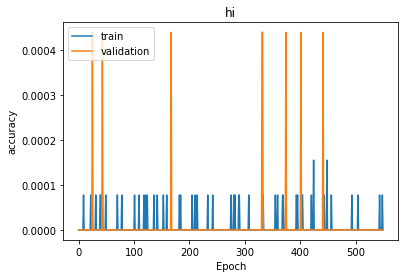

In [10]:
show_train_history(train_history,'accuracy','val_accuracy')

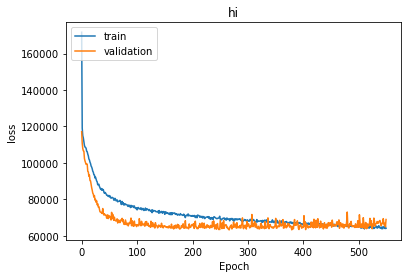

In [11]:
show_train_history(train_history,'loss','val_loss')

In [18]:
ndarray_test = test_data.values
test_features = ndarray_test[:,1:]

In [19]:
features.std(axis = 0)

array([4.68087637e-01, 3.11354557e+00, 8.63488368e+00, 9.37549119e-01,
       7.67666886e-01, 9.16635733e+02, 3.82075450e+04, 2.94171976e+01,
       5.52666111e-01, 8.83421254e-02, 7.69305737e-01, 6.51846350e-01,
       1.16679958e+00, 8.24324285e+02, 4.41945970e+02, 2.94171976e+01,
       4.00241361e+02, 5.35289946e+01, 1.39165561e-01, 1.41289336e-01,
       6.83344356e+02, 2.70446571e+04])

In [20]:
test_features [:1]

array([[ 2.01500e+03,  3.00000e+00,  2.50000e+01,  4.00000e+00,
         1.75000e+00,  2.36000e+03,  6.00000e+03,  1.95500e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.28000e+03,  1.08000e+03,  1.95500e+03,
         0.00000e+00,  9.81090e+04,  4.76465e+01, -1.22357e+02,
         1.70000e+03,  3.46000e+03]])

In [21]:
test_features = (test_features - features.mean(axis = 0)) / features.std(axis = 0)

In [22]:
test_features[:5]

array([[ 1.44367579, -1.14511748,  1.07184863,  0.67854721, -0.46664312,
         0.31620831, -0.23291148, -0.54062105, -0.79933184, -0.08904255,
        -0.30443226, -0.6350184 , -0.55168603, -0.60601965,  1.78620148,
        -0.54062105, -0.20931183,  0.5742488 ,  0.62861803, -1.00925034,
        -0.40917905, -0.34317911],
       [ 1.44367579, -0.50276298, -1.70757503, -0.38806357,  0.83600523,
         1.5707961 ,  2.02703483,  0.64915917,  1.01007891, -0.08904255,
        -0.30443226, -0.6350184 ,  2.01944961,  2.09922638, -0.65753615,
         0.64915917, -0.20931183, -0.75213516, -1.33307421,  1.39008147,
         1.44932756,  0.89958022],
       [-0.6926763 ,  0.46076876,  1.5350859 , -1.45467436, -1.44362938,
        -1.14565921, -0.25908432, -1.86637616, -0.79933184, -0.08904255,
        -0.30443226,  0.89908546, -0.55168603, -0.9214295 , -0.65753615,
        -1.86637616, -0.20931183,  0.72370051,  0.8556857 , -1.05171639,
        -0.73112507, -0.28623625],
       [ 1.44367579

In [23]:
Y_predict = reload_model.predict(test_features)

In [24]:
Y_predict[:5]

array([[658437.8 ],
       [682354.5 ],
       [477547.16],
       [375993.88],
       [860720.  ]], dtype=float32)

In [25]:
frame_test_data = pd.DataFrame(Y_predict,columns = ["price"])

In [26]:
frame_test_data[:10]

,price
0,658437.81250
1,682354.50000
2,477547.15625
3,375993.87500
4,860720.00000
5,415378.43750
6,189023.93750
7,311282.09375
8,332086.96875
9,512172.06250


In [27]:
pd = test_data
pd.insert(len(test_data.columns),'price',frame_test_data)

In [28]:
pd[:2]

,id,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,2015,3,25,4,1.75,2360,6000,1955,1,...,1280,1080,1955,0,98109,47.6465,-122.357,1700,3460,658437.8125
1,2,2015,5,1,3,2.75,3510,92347,1990,2,...,3510,0,1990,0,98038,47.3735,-122.018,2970,37070,682354.5000


In [26]:
final_cols = ["id","price"]
pd = pd[final_cols]
pd.to_csv('C:/Users/TEST/vscode/machine learning/ntut-ml-regression-2020/result1.csv', index = False, header = True)

In [25]:
def smooth_curve(points, factor =0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
        return smoothed_points
smoothed_mae_history = smooth_curve(train_history[10:,10:])
plt.plot(range(1,len(smoothed_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epoch')
plt.ylabel(train)
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

TypeError: 'History' object is not subscriptable